In [1]:
import pandas as pd

In [7]:
df = pd.read_excel('Data (Edited).xlsx', sheet_name='Edited_Data')
df.head(3)

,Respondent ID,Start Date,End Date,Email Address,First Name,Last Name,Custom Data 1,Identify which division you work in.-Response,Identify which division you work in.-Other (please specify),Which of the following best describes your position level?-Response,...,Question 29-Response 8,Question 29-Response 9,Question 29-Response 10,Question 29-Response 11,Question 29-Response 12,Question 29-Response 13,Question 29-Response 14,Question 30-Response 1,Question 30-Response 2,Question 30-Response 3
0,5379192392,2021-01-22 12:01:17,2021-01-22 12:40:34,NaN,NaN,NaN,NaN,Infrastructure,NaN,Staff,...,NaN,Answer 8,Answer 8,Answer 4,NaN,NaN,Answer 5,NaN,NaN,NaN
1,2658722536,2021-01-22 06:56:37,2021-01-22 07:34:10,NaN,NaN,NaN,NaN,Finance,NaN,Staff,...,NaN,Answer 5,NaN,NaN,Answer 2,NaN,Answer 5,NaN,NaN,Answer 1
2,4044163394,2021-01-22 06:35:18,2021-01-22 06:47:32,NaN,NaN,NaN,NaN,Infrastructure,NaN,Department Lead,...,NaN,NaN,Answer 4,Answer 4,Answer 6,NaN,Answer 6,NaN,Answer 1,NaN


In [11]:
df.columns

Index(['Respondent ID', 'Start Date', 'End Date', 'Email Address',
       'First Name', 'Last Name', 'Custom Data 1',
       'Identify which division you work in.-Response',
       'Identify which division you work in.-Other (please specify)',
       'Which of the following best describes your position level?-Response',
       'Which generation are you apart of?-Response',
       'Please select the gender in which you identify.-Response',
       'Which duration range best aligns with your tenure at your company?-Response',
       'Which of the following best describes your employment type?-Response',
       'Question 1-Response', 'Question 2-Response',
       'Question 3-Open-Ended Response', 'Question 4-Response',
       'Question 4-Other (please specify)', 'Question 5-Response 1',
       'Question 5-Response 2', 'Question 5-Response 3',
       'Question 5-Response 4', 'Question 5-Response 5',
       'Question 5-Response 6', 'Question 6-Response 1',
       'Question 6-Response 2', 'Qu

In [13]:
#Make a copy of the dataframe so that it can be rolled back juat in case
df_copy = df.copy()
len(df_copy['Respondent ID']) * len(df_copy.columns)

19800

In [14]:
df_copy.drop(['Start Date', 'End Date', 'Email Address',
       'First Name', 'Last Name', 'Custom Data 1'], axis=1, inplace=True)

In [15]:
df_copy.columns

Index(['Respondent ID', 'Identify which division you work in.-Response',
       'Identify which division you work in.-Other (please specify)',
       'Which of the following best describes your position level?-Response',
       'Which generation are you apart of?-Response',
       'Please select the gender in which you identify.-Response',
       'Which duration range best aligns with your tenure at your company?-Response',
       'Which of the following best describes your employment type?-Response',
       'Question 1-Response', 'Question 2-Response',
       'Question 3-Open-Ended Response', 'Question 4-Response',
       'Question 4-Other (please specify)', 'Question 5-Response 1',
       'Question 5-Response 2', 'Question 5-Response 3',
       'Question 5-Response 4', 'Question 5-Response 5',
       'Question 5-Response 6', 'Question 6-Response 1',
       'Question 6-Response 2', 'Question 6-Response 3',
       'Question 6-Response 4', 'Question 6-Response 5',
       'Question 6-Res

In [20]:
#Selecting the column we don't want to unpivot
id_var = list(df_copy.columns[:8])
id_var

['Respondent ID',
 'Identify which division you work in.-Response',
 'Identify which division you work in.-Other (please specify)',
 'Which of the following best describes your position level?-Response',
 'Which generation are you apart of?-Response',
 'Please select the gender in which you identify.-Response',
 'Which duration range best aligns with your tenure at your company?-Response',
 'Which of the following best describes your employment type?-Response']

In [22]:
value_var = list(df_copy.columns[8:])
value_var

['Question 1-Response',
 'Question 2-Response',
 'Question 3-Open-Ended Response',
 'Question 4-Response',
 'Question 4-Other (please specify)',
 'Question 5-Response 1',
 'Question 5-Response 2',
 'Question 5-Response 3',
 'Question 5-Response 4',
 'Question 5-Response 5',
 'Question 5-Response 6',
 'Question 6-Response 1',
 'Question 6-Response 2',
 'Question 6-Response 3',
 'Question 6-Response 4',
 'Question 6-Response 5',
 'Question 6-Response 6',
 'Question 7-Response 1',
 'Question 7-Unscheduled',
 'Question 8-Response 1',
 'Question 8-Response 2',
 'Question 8-Response 3',
 'Question 8-Response 4',
 'Question 9-Response 1',
 'Question 9-Response 2',
 'Question 9-Response 3',
 'Question 9-Response 4',
 'Question 10-Response 1',
 'Question 10-Response 2',
 'Question 10-Response 3',
 'Question 10-Response 4',
 'Question 10-Response 5',
 'Question 11-Reponse 1',
 'Question 11-Response 2',
 'Question 12-Response',
 'Question 13-Response',
 'Question 14-Response',
 'Question 15-Respo

## Functionality of Pandas.melt() for unpivoting tables

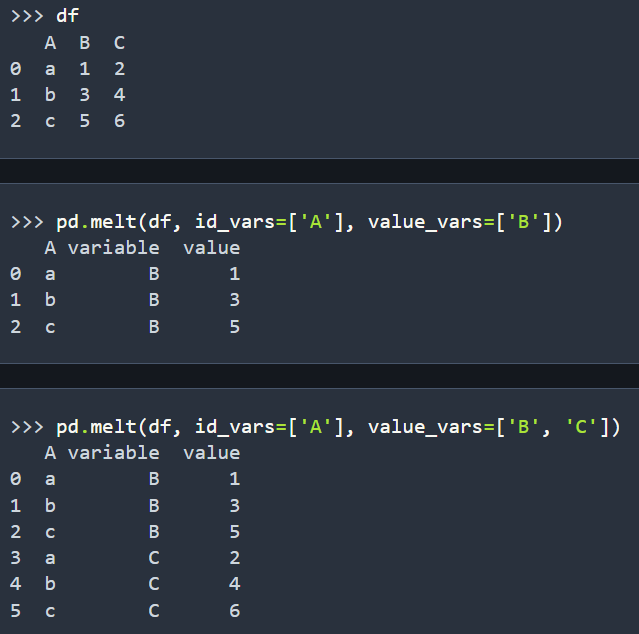

In [34]:
df_melted = pd.melt(df_copy, id_vars= id_var, value_vars = value_var, value_name = 'Answer', var_name = 'Question + Subquestion')

In [35]:
df_melted.head(6)

,Respondent ID,Identify which division you work in.-Response,Identify which division you work in.-Other (please specify),Which of the following best describes your position level?-Response,Which generation are you apart of?-Response,Please select the gender in which you identify.-Response,Which duration range best aligns with your tenure at your company?-Response,Which of the following best describes your employment type?-Response,Question + Subquestion,Answer
0,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1-Response,NaN
1,2658722536,Finance,NaN,Staff,NaN,NaN,10+ years,Full time Employee,Question 1-Response,Answer 4
2,4044163394,Infrastructure,NaN,Department Lead,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1-Response,Answer 5
3,5535865599,Infrastructure,NaN,Manager,Millennial (born between 1981-2000),Non-Binary,5-10 years,Full time Employee,Question 1-Response,Answer 1
4,3356802928,Port Operations,NaN,Manager,Generation X (born between 1965-1980),Female,10+ years,Full time Employee,Question 1-Response,NaN
5,3399511781,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1-Response,Answer 8


In [36]:
df_melted[df_melted['Respondent ID'] == 5379192392]

,Respondent ID,Identify which division you work in.-Response,Identify which division you work in.-Other (please specify),Which of the following best describes your position level?-Response,Which generation are you apart of?-Response,Please select the gender in which you identify.-Response,Which duration range best aligns with your tenure at your company?-Response,Which of the following best describes your employment type?-Response,Question + Subquestion,Answer
0,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1-Response,NaN
198,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 2-Response,Answer 6
396,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 3-Open-Ended Response,NaN
594,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 4-Response,Answer 2
792,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 4-Other (please specify),NaN
...,...,...,...,...,...,...,...,...,...,...
16038,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 29-Response 13,NaN
16236,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 29-Response 14,Answer 5
16434,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 30-Response 1,NaN
16632,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 30-Response 2,NaN


As you can see these are all the rows created for `Respondent Id = 5379192392` with each question they answered

In [37]:
df_melted.columns

Index(['Respondent ID', 'Identify which division you work in.-Response',
       'Identify which division you work in.-Other (please specify)',
       'Which of the following best describes your position level?-Response',
       'Which generation are you apart of?-Response',
       'Please select the gender in which you identify.-Response',
       'Which duration range best aligns with your tenure at your company?-Response',
       'Which of the following best describes your employment type?-Response',
       'Question + Subquestion', 'Answer'],
      dtype='object')

In [48]:
df_melted.to_excel('Temporary.xlsx', index = False)

In [45]:
#Let's import the questions sheet in excel
question_import = pd.read_excel('Data (Edited).xlsx', sheet_name = 'Question')
question_import

,Raw Question,Raw Subquestion,Question,Question + Subquestion
0,Respondent ID,NaN,Respondent ID,Respondent ID
1,Start Date,NaN,Start Date,Start Date
2,End Date,NaN,End Date,End Date
3,Email Address,NaN,Email Address,Email Address
4,First Name,NaN,First Name,First Name
...,...,...,...,...
95,NaN,Response 13,Question 29,Question 29-Response 13
96,NaN,Response 14,Question 29,Question 29-Response 14
97,Question 30,Response 1,Question 30,Question 30-Response 1
98,NaN,Response 2,Question 30,Question 30-Response 2


In [46]:
questions = question_import.copy()
questions.head(2)

,Raw Question,Raw Subquestion,Question,Question + Subquestion
0,Respondent ID,NaN,Respondent ID,Respondent ID
1,Start Date,NaN,Start Date,Start Date


In [47]:
#Drop unwanted columns
questions.drop(['Raw Question', 'Raw Subquestion'], axis = 1, inplace = True)
questions

,Question,Question + Subquestion
0,Respondent ID,Respondent ID
1,Start Date,Start Date
2,End Date,End Date
3,Email Address,Email Address
4,First Name,First Name
...,...,...
95,Question 29,Question 29-Response 13
96,Question 29,Question 29-Response 14
97,Question 30,Question 30-Response 1
98,Question 30,Question 30-Response 2


Now refer back to the desired format we wanted. We already have the following
* ID,
* Demographic Columns
* Question + Subquestion
* Answer

What we don't have are:
* Question
* Same Answer
* Total Respondants

First we can add the Question column to the melted data set by emulating a JOIN in Pandas using `Pandas.Merge()` function.
To do this we can use the `df_melted` and `questions` frames


In [49]:
#Merging for Questions Column
df_merged = pd.merge(left = df_melted, right = questions, how = 'left', left_on = 'Question + Subquestion', right_on = 'Question + Subquestion')

#Important Checks
#df_merged and df_meted should have the same number of rows
print("Length of the Original Melted Dataset: ", len(df_melted))
print("Length of the Merged Dataset: ", len(df_merged))

Length of the Original Melted Dataset:  17028
Length of the Merged Dataset:  17028


In [50]:
df_merged.head()

,Respondent ID,Identify which division you work in.-Response,Identify which division you work in.-Other (please specify),Which of the following best describes your position level?-Response,Which generation are you apart of?-Response,Please select the gender in which you identify.-Response,Which duration range best aligns with your tenure at your company?-Response,Which of the following best describes your employment type?-Response,Question + Subquestion,Answer,Question
0,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1-Response,NaN,Question 1
1,2658722536,Finance,NaN,Staff,NaN,NaN,10+ years,Full time Employee,Question 1-Response,Answer 4,Question 1
2,4044163394,Infrastructure,NaN,Department Lead,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1-Response,Answer 5,Question 1
3,5535865599,Infrastructure,NaN,Manager,Millennial (born between 1981-2000),Non-Binary,5-10 years,Full time Employee,Question 1-Response,Answer 1,Question 1
4,3356802928,Port Operations,NaN,Manager,Generation X (born between 1965-1980),Female,10+ years,Full time Employee,Question 1-Response,NaN,Question 1


In [56]:
df_merged.to_excel('Merged.xlsx', index = False)

Now let's find how many respondants answered each question using `Pandas.groupby()` function

In [72]:
answered_responses = df_merged[df_merged['Answer'].notna()] #Getting only non-null values of a specific column in a data frame
answered_responses = answered_responses.groupby(['Question'])['Respondent ID'].nunique().reset_index()
#Renaming the 'Respondent ID' column to something else (that makes sense)
answered_responses.rename(columns = {"Respondent ID" : "Count of Respondents"}, inplace=True)

In [73]:
answered_responses

,Question,Count of Respondents
0,Question 1,119
1,Question 10,198
2,Question 11,164
3,Question 12,114
4,Question 13,108
5,Question 14,105
6,Question 15,114
7,Question 16,117
8,Question 17,135
9,Question 18,109


In [75]:
#Let's merge the count of respondents into original dataset
df_merged_2 = pd.merge(left = df_merged, right = answered_responses, how = 'left', left_on = 'Question', right_on = 'Question')
df_merged_2.head()

,Respondent ID,Identify which division you work in.-Response,Identify which division you work in.-Other (please specify),Which of the following best describes your position level?-Response,Which generation are you apart of?-Response,Please select the gender in which you identify.-Response,Which duration range best aligns with your tenure at your company?-Response,Which of the following best describes your employment type?-Response,Question + Subquestion,Answer,Question,Count of Respondents
0,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1-Response,NaN,Question 1,119
1,2658722536,Finance,NaN,Staff,NaN,NaN,10+ years,Full time Employee,Question 1-Response,Answer 4,Question 1,119
2,4044163394,Infrastructure,NaN,Department Lead,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1-Response,Answer 5,Question 1,119
3,5535865599,Infrastructure,NaN,Manager,Millennial (born between 1981-2000),Non-Binary,5-10 years,Full time Employee,Question 1-Response,Answer 1,Question 1,119
4,3356802928,Port Operations,NaN,Manager,Generation X (born between 1965-1980),Female,10+ years,Full time Employee,Question 1-Response,NaN,Question 1,119


In [76]:
df_merged_2.to_excel('Merged_2.xlsx', index = False)

In [100]:
#Let's find the same answer propotions
same_answer = df_merged_2.groupby(['Question + Subquestion','Answer'])['Respondent ID'].count().reset_index()
same_answer.rename(columns = {'Respondent ID' : 'Number of Same Answers'}, inplace = True)
#same_answer.to_excel('Same_Answer.xlsx', index = False)

In [101]:
same_answer

,Question + Subquestion,Answer,Number of Same Answers
0,Question 1-Response,Answer 1,14
1,Question 1-Response,Answer 2,10
2,Question 1-Response,Answer 3,13
3,Question 1-Response,Answer 4,17
4,Question 1-Response,Answer 5,22
...,...,...,...
683,Question 9-Response 4,Answer 4,16
684,Question 9-Response 4,Answer 5,13
685,Question 9-Response 4,Answer 6,14
686,Question 9-Response 4,Answer 7,12


In [105]:
df_merged_3 = pd.merge(left = df_merged_2, right = same_answer, how = 'left', left_on = ['Question + Subquestion', 'Answer'], 
                       right_on = ['Question + Subquestion', 'Answer'])
df_merged_3['Number of Same Answers'].fillna(0, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2436\1923280597.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged_3['Number of Same Answers'].fillna(0, inplace=True)


In [106]:
df_merged_3.to_excel('Merged_3.xlsx', index = False)
df_merged_3.head()

,Respondent ID,Identify which division you work in.-Response,Identify which division you work in.-Other (please specify),Which of the following best describes your position level?-Response,Which generation are you apart of?-Response,Please select the gender in which you identify.-Response,Which duration range best aligns with your tenure at your company?-Response,Which of the following best describes your employment type?-Response,Question + Subquestion,Answer,Question,Count of Respondents,Number of Same Answers
0,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1-Response,NaN,Question 1,119,0.0
1,2658722536,Finance,NaN,Staff,NaN,NaN,10+ years,Full time Employee,Question 1-Response,Answer 4,Question 1,119,17.0
2,4044163394,Infrastructure,NaN,Department Lead,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1-Response,Answer 5,Question 1,119,22.0
3,5535865599,Infrastructure,NaN,Manager,Millennial (born between 1981-2000),Non-Binary,5-10 years,Full time Employee,Question 1-Response,Answer 1,Question 1,119,14.0
4,3356802928,Port Operations,NaN,Manager,Generation X (born between 1965-1980),Female,10+ years,Full time Employee,Question 1-Response,NaN,Question 1,119,0.0


In [107]:
#Let's rename the columns of the final dataset to deliver
output_df = df_merged_3.copy()
output_df.columns

Index(['Respondent ID', 'Identify which division you work in.-Response',
       'Identify which division you work in.-Other (please specify)',
       'Which of the following best describes your position level?-Response',
       'Which generation are you apart of?-Response',
       'Please select the gender in which you identify.-Response',
       'Which duration range best aligns with your tenure at your company?-Response',
       'Which of the following best describes your employment type?-Response',
       'Question + Subquestion', 'Answer', 'Question', 'Count of Respondents',
       'Number of Same Answers'],
      dtype='object')

In [110]:
output_df.rename(columns= {
    'Identify which division you work in.-Response' : 'Division',
    'Identify which division you work in.-Other (please specify)' : 'Division-Other',
    'Which of the following best describes your position level?-Response' : 'Position Level',
    'Which generation are you apart of?-Response' : 'Generation',
    'Please select the gender in which you identify.-Response' : 'Gender',
    'Which duration range best aligns with your tenure at your company?-Response' : 'Tenure Duartion',
    'Which of the following best describes your employment type?-Response' : 'Employemnt Mode',
    'Count of Respondents' : 'Number of Responses'}, inplace = True)

In [111]:
output_df.head(10)

,Respondent ID,Division,Division-Other,Position Level,Generation,Gender,Tenure Duartion,Employemnt Mode,Question + Subquestion,Answer,Question,Number of Responses,Number of Same Answers
0,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1-Response,NaN,Question 1,119,0.0
1,2658722536,Finance,NaN,Staff,NaN,NaN,10+ years,Full time Employee,Question 1-Response,Answer 4,Question 1,119,17.0
2,4044163394,Infrastructure,NaN,Department Lead,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1-Response,Answer 5,Question 1,119,22.0
3,5535865599,Infrastructure,NaN,Manager,Millennial (born between 1981-2000),Non-Binary,5-10 years,Full time Employee,Question 1-Response,Answer 1,Question 1,119,14.0
4,3356802928,Port Operations,NaN,Manager,Generation X (born between 1965-1980),Female,10+ years,Full time Employee,Question 1-Response,NaN,Question 1,119,0.0
5,3399511781,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1-Response,Answer 8,Question 1,119,16.0
6,9860597462,Infrastructure,NaN,Department Lead,Baby Boomer (born between 1946-1964),Male,10+ years,Full time Employee,Question 1-Response,Answer 8,Question 1,119,16.0
7,1494621946,Infrastructure,NaN,Chief / Executive,Baby Boomer (born between 1946-1964),Male,3-5 years,Full time Employee,Question 1-Response,NaN,Question 1,119,0.0
8,8646387163,Information Technology,NaN,Manager,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1-Response,Answer 3,Question 1,119,13.0
9,2455127238,Information Technology,NaN,Staff,Millennial (born between 1981-2000),Male,0-2 years,Full time Employee,Question 1-Response,Answer 4,Question 1,119,17.0


In [112]:
output_df.to_excel('Output.xlsx', index = False)